##### Contenido bajo Creative Commons Attribution license CC-BY 4.0, código bajo licencia MIT. (c) 2015 O. Skurtys y C. Cooper

# Solución numérica de ecuaciones diferenciales ordinarias

¡Bienvenidos al tercer laboratorio! Hoy vamos a resolver ecuaciones diferenciales ordinarias (EDO) numéricamente utilizando métodos que probablemente han escuchado antes, como Euler o Runge-Kutta. 

Hagamos algo de memoria. Una EDO es una ecuación donde hay una derivada de una función que depende de una sola variable. Por ejemplo, en la ecuación

\begin{equation}
\frac{dy}{dt} = f(t,y(t))
\end{equation}

la función $y$ depende solamente de la variable $t$. La derivada en este caso es de primer orden, pero podría ser de orden superior.

En este laboratorio vamos a discretizar una ecuación de este tipo, para resolverla numéricamente.


## Trabajo preliminar

Antes resolver una ecuación diferencial ordinaria (EDO) en el contexto de un problema físico, es aconsejable simplificar las ecuaciones y definir un nuevo sistema de unidades adaptados al problema. En efecto, para minimizar los errores de redondeo, es bueno que los valores numericos utilizados sean del orden de la unidad.

Por ejemplo, para tratar el problema de movimiento de 2 astros ligados por la gravitación, es preferable adoptar unidades astronomicas (tiempo en año, masas en masas solares, distancia en distancia tierra-sol) que en el sistema internacional (segundo, kilogramo, metro).

Cambiar las unidades, finalmente, es definir nuevas magnitud adimensionales. Se buscará siempre a reescribir la EDO usando magnitudes sin dimensión.

### Un ejemplo

Tomamos por ejemplo la caida de una esfera en un fluido. Se supone que la resitencia que recibe la esfera proporcional a su velocidad: $F_{arrastre} \propto v$. La relación fundamental de la dinámica permite escribir la ecuación diferencial ordinaria siguiente:

\begin{equation}
m \frac{dv}{dt} = -\alpha v +mg   \quad {\rm con} \quad   v(0)=0
\end{equation}

donde $m$ es la masa, $\alpha$ es el coeficiente de fricción (unidades de masa dividido por tiempo) y $g$ es el campo de gravedad. Se puede definir un tiempo caracteristico (tiempo de relaxación): $\tau = \frac{m}{\alpha}$; una velocidad caracteristica (velocidad limite): $v_{\infty}=g \tau$. Así, podemos adoptar un nuevo sistema de unidad:

* El tiempo se medido en unidad de $\tau$, donde la nueva variable temporal es $t^*=\frac{t}{\tau}$.
* La velocidad es medida en unidad de $v_{\infty}$, donde la nueva variable es  $v^*=\frac{v}{v_{\infty}}$.
* La distancia es el producto de una velocidad por un tiempo, es medida en unidad de $h$ con $h= v_{\infty} \tau$.

Con este nuevo sistema de unidad y de variables adimensionales, la ecuación diferencial inicial toma la forma más simple:

\begin{equation}
\frac{dv^*}{dt^*} = 1- v^*  \quad {\rm con} \quad   v^*(0)=0
\end{equation}

Esta ecuación diferencial puede se obtener si hacemos $\tau=1$ y $v_{\infty}=1$. Finalmente, cuando fijamos unitario los parametros fisicos, definimos un nuevo conjunto de unidad.

# Método de Euler explicito

El metodo de Euler explicito es el metodo el más simple a programar y a entender. Consideramos la ecuación diferencial siguiente:

\begin{eqnarray}
\frac{dy}{dt} & = & \dot{y} = f(t,y(t)) \qquad 0 \leq t \leq T \\
y(0) & = & 0
\end{eqnarray}

Se puede integrar la ecuación:

\begin{equation}
y(t_{n+1})=y(t_n)+\int_{t_n}^{t_{n+1}} f(t,y(t)) \, dt
\end{equation}

El metodo de Euler consiste a aproximar la integral por el metodo de los rectangulos (a la izquierza):

\begin{equation}
\int_{t_n}^{t_{n+1}} f(t,y(t)) \, dt \approx dt \times f(t_n,y(t_n))
\end{equation}

Así, el esquema iterativo es el siguiente:

\begin{eqnarray}
y_{n+1} & = & y_n + dt f(t_n,y(t_n)) \qquad n=0, \dots,N \\
y(0) & = & 0
\end{eqnarray}
donde $y_n$ es la aproximación numerica de $y(t_n)$

La programación es muy simple. El algorithmo de Euler es:

1. Definir el paso $dt$, de la duración $T$. 
2. Inicialización de las condiciones iniciales: $t=0$ y $y=y(0)$.
3. Mientras que $t \leq T$: 
  1. Calculo de $k_1=f(t,y)$
  2. $y=y+dt$; $k_1$; $t_{new}=t+dt$
  3. Guardar los datos

## Ejemplo

Aplicamos el metodo del problema de caida libre visto anteriormente. La ecuación diferencial ordinaria es:

$$\begin{equation}
\frac{dv^*}{dt^*} = 1- v^*  \qquad {\rm con} \qquad   v^*(0)=0
\end{equation}$$

y el esquema iterativo se escribe:

\begin{eqnarray}
v_{n+1}^* & = & v_n^* + dt(1-v_n^*) \\
v_0^* & = & 0
\end{eqnarray}

Se puede ver que el metodo de Euler es una aproximación de primer orden en $dt$. De hecho, si calculamos el primer termino $v_1^*$ y lo comparamos con la solución exacta $v^*(dt)$ (que conocemos: $v^*(t^*)=1-e^{-t^*}$), tenemos:

\begin{align}
v_1^*&=dt \\
v^*(dt)&=1-e^{-dt}
\end{align}

La expansión de $e^{-dt}$ hasta el término de primer orden es:

\begin{equation}
e^{-dt}=1-dt+O(dt^2)
\end{equation}

y reordenando queda

\begin{equation}
dt = 1 - e^{-dt} + O(dt^2)
\end{equation}

haciendo evidente que $dt$ es una aproximación de primer orden.

Las figuras abajo muestran el comportamiento de la solución numerica para diferentes pasos de tiempo $dt$. Prueben con `nt=5` $(dt=2)$, `nt=50` $(dt=0,2)$, y `nt=500`$(dt=0,02)$ ¿Qué pasa en cada caso?

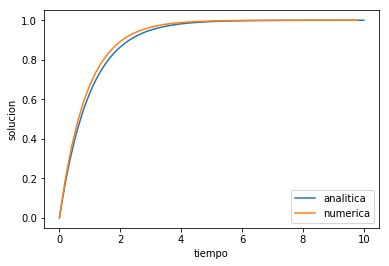

In [1]:
import numpy 
def Euler(f,t0,tf,y0,n):
    """
    Ecuación y'=f(y(t),t), condición inicial (t0,y0), 
    valor terminal tf, n es el número de etapa
    """
    h=(tf-t0)/(n)
    t = numpy.arange(t0,tf,h) # h es el paso de tiempo dt
    y = numpy.zeros(n)
    y[0] = y0
    for i in range(n-1):
        t[i+1] = t[i] + h
        y[i+1] = y[i] + h*f(t[i],y[i])
    return t,y

# Ejemplo la función 1-v
def f(t,y):
    return 1-y

t_final   = 10
t_inicial = 0
y_inicial = 0
nt        = 50

t,y = Euler(f, t_inicial, t_final, y_inicial, nt)

# Grafico ensayar por 3 valores de h es decir tomando  n=50 ; n=500 y n=5
import matplotlib.pyplot as plt
%matplotlib inline

tsol = numpy.linspace(0,10,101) # dibuja la solucion analitica
    
plt.plot(tsol,1-numpy.exp(-tsol), label='analitica')
plt.plot(t,y, label='numerica') # dibuja la solucion numerica
plt.ylabel("solucion")
plt.xlabel("tiempo")
plt.legend();

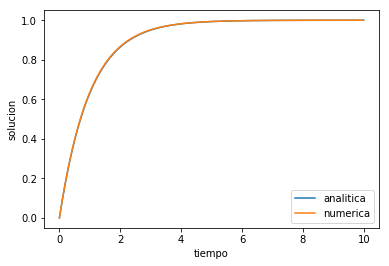

In [2]:
# Ejemplo la función 1-v
def f(t,y):
    return 1-y

t_final   = 10
t_inicial = 0
y_inicial = 0
nt        = 500

t,y = Euler(f, t_inicial, t_final, y_inicial, nt)

# Grafico ensayar por 3 valores de h es decir tomando  n=50 ; n=500 y n=5
import matplotlib.pyplot as plt
%matplotlib inline

tsol = numpy.linspace(0,10,101) # dibuja la solucion analitica
    
plt.plot(tsol,1-numpy.exp(-tsol), label='analitica')
plt.plot(t,y, label='numerica') # dibuja la solucion numerica
plt.ylabel("solucion")
plt.xlabel("tiempo")
plt.legend();

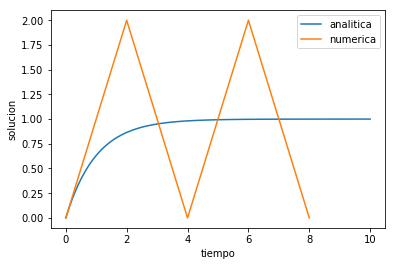

In [3]:
# Ejemplo la función 1-v
def f(t,y):
    return 1-y

t_final   = 10
t_inicial = 0
y_inicial = 0
nt        = 5

t,y = Euler(f, t_inicial, t_final, y_inicial, nt)

# Grafico ensayar por 3 valores de h es decir tomando  n=50 ; n=500 y n=5
import matplotlib.pyplot as plt
%matplotlib inline

tsol = numpy.linspace(0,10,101) # dibuja la solucion analitica
    
plt.plot(tsol,1-numpy.exp(-tsol), label='analitica')
plt.plot(t,y, label='numerica') # dibuja la solucion numerica
plt.ylabel("solucion")
plt.xlabel("tiempo")
plt.legend();

Si h=0,2 se observa un error $\varepsilon = |y_n-y(t_n)|$ de algunos %, y si $h \ll 1$ el error no es significativo. 

En el caso $h=2$ el paso de tiempo es más grande que el tiempo caracteristico $\tau=1$, y aparece un fenomeno de inestabilidad numérica, que es un inconvemiente del metodo de Euler.

### Ventajas e inconvenientes del método

El método de Euler tiene la ventaja de ser simple de programar y produce en varios casos una solución aceptable como primera aproximación al fenomeno estudiado.

Por otra parte, tiene el inconveniente de propagar fácilmente los errores y de amplificarlos. Además, es inestable en ciertas circunstancias.

# Metodo de Runge Kutta de orden 4

El metodo de Runge-Kutta de orden 4 (RK4) es muy utilizado porque es más preciso y estable que el metodo de Euler. En efecto, este método tiene una estimación más precisa de la integral de la EDO.

El esquema numérico de RK4 es

\begin{equation}
\left\{
\begin{array}{l}
k_1^n = f(t_n,y_n) \\
k_2^n = f\left(t_n+\frac{h}{2},y_n+h \frac{k_1^n}{2}\right) \\
k_3^n = f\left(t_n+\frac{h}{2},y_n+h \frac{k_2^n}{2}\right) \\
k_4^n = f\left(t_{n+1}, y_n+h k_3^n \right) \\
y_0 = y(0) \\
\\
y_{n+1} = y_n + \frac{h}{6} \left(k_1^n +2 k_2^n+2 k_3^n+k_4^n \right) \qquad n=0,1,\dots,N
\end{array}
\right.
\end{equation}

Donde $h$ es el paso de tiempo $dt$. Se ve inmediatamente un defecto respecto al metodo de Euler: el algorithmo exige 4 veces más cálculos en cada paso y entonces es más lento. Además, los errores de redondeos que se acumulan más rapidamente. Sin embargo, estos defectos son compensados por una mejor precisión.

Algorithmo Runge-Kutta orden 4

1. Inicialización del paso $h$ y la duración $T$. 
2. Inicialización de las condiciones iniciales: $t=0$ y $y=y(0)$.
3. Mientras que $t \leq T$: 
    1. Calculo de $k_1 = f(t,y)$
    2. Calculo de $k_2 = f\left(t+\frac{h}{2},y+h \frac{k_1}{2}\right)$
    3. Calculo de $k_3 = f\left(t+\frac{h}{2},y+h \frac{k_2}{2}\right)$
    4. Calculo de $k_4 = f\left(t_{n+1}, y+h k_3 \right)$
    5. $y = y + \frac{h}{6} \left(k_1 +2 k_2+2 k_3+k_4 \right)$ ; $t=t+h$
    6. Guardar los datos

## Ejemplo

Comparemos el método de RK4 con el método de Euler para el ejemplo de la esfera en caída libre. Usen los mismos valores de `t_inicial`, `t_final` y `y_inicial` que en el caso anterior, y prueben con `nt = 5, 50, 500`.

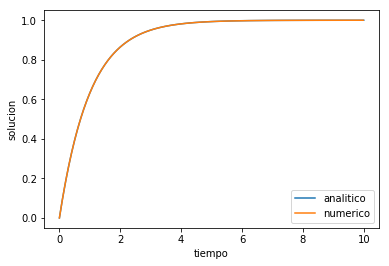

In [13]:
#### ALUMNO
#def RungeKutta4(f,t0,tf,y0,n):
# Hacer una función para integrar con RK4
####
def RungeKutta4(f,t0,tf,y0,n):
    h=(tf-t0)/n
    t = numpy.arange(t0,tf,h)
    y = numpy.zeros(n)
    y[0] = y0
    for i in range(n-1):
        k1 = f( t[i] , y[i] )
        k2 = f( t[i]+0.5*h , y[i]+0.5*h*k1)
        k3 = f( t[i]+0.5*h , y[i]+0.5*h*k2)
        k4 = f( t[i]+h , y[i]+h*k3)
        y[i+1] = y[i] + h*(k1+2*k2+2*k3+k4)/6
    return t,y

t_final   = 10
t_inicial = 0
y_inicial = 0
nt        = 500


t,y = RungeKutta4(f,t_inicial, t_final, y_inicial, nt)

plt.plot(tsol,1-numpy.exp(-tsol), label="analitico")
plt.plot(t,y, label="numerico") # dibuja la solucion numerica
plt.ylabel("solucion")
plt.xlabel("tiempo")
plt.legend();

Pueden ver que para $h=2$ ya no tenemos las instabilidades numericas observadas con el metodo de Euler. Sin embargo la solución obtenida con RK4 está alejada de la solución analitica. Para $h=0,2$, la solución numerica es ya aceptable, mostrando la superioridad del metodo RK4 sobre el metodo de Euler.

El cálculo del primer término $v_1^*$ nos da la razón de este comportamiento:
\begin{equation}
v_1^* = h-\frac{1}{2}h^2 +\frac{1}{6}h^3-\frac{1}{24}h^4
\end{equation}

coincide con la expansión de orden 4 de la solución analítica de $v(h)$.

### Ventaja del método

El metodo RK4 permite ganar en estabilidad y en precisión con un número de pasos pequeño, lo que lo hace un algorithmo bastante usado.

## Los errores numericos

**Importante:** nunca usar un algoritmo a ojos cerrados, sin hacer un análisis critico de los resultados. Si Ud. busca precisión, es importante tener una idea del error producido por el algoritmo. Hay dos tipos de error: error de redondeo y error de truncamiento.

### Error de redondeo

Algunas reglas para limitar los errores de redondeo:
* Usar un sistema de unidades tel que los valores usadas sean del orden de la unidad
* Evitar sustracción de numeros comparables
* Minimizar las sustracciones
* Buscar a sumar por paquete las cantidades de misma orden de magnitud.

### Error de truncamiento

El truncamiento consiste a reemplazar la expansión en una serie infinita por una expansión con orden limitado. Se obtiene entonces un resultado que contiene un error de aproximación, conocido como error de truncatura.

En análisis numerico existe varias manera de medir este error: $\varepsilon_T$.

* Por ejemplo, se puede calcular la diferencia entre la solución exacta $y(T)$ y la solución aproximada $y_N$
\begin{equation}
\varepsilon_T = |y(T)-y_N|
\end{equation}

* Se dice que el metodo es de orden $p$ cuando $\varepsilon_T \propto \frac{1}{N^p}$.

* El metodo de Euler produce un error del orden $h^2$ en cada paso de tiempo, eso da finalmente un error total:
\begin{equation}
\varepsilon_T \approx N h^2 = \frac{T^2}{N}
\end{equation}
sea el metodo de Euler es de orden 1.

* El metodo de Runge-Kutta 4 es, como su nombre lo indica, de orden 4, entonces tenemos en cada paso de tiempo un error de truncamiento de $h^5$.

### Comentarios
Es imposible minimizar al mismo tiempo el error de redondeo y el error de truncación. Se debe encontrar un balance aceptable para minimizar el error total y el tiempo de cálculo.

## En caída libre

En realidad, la resistencia del fluido sobre un cuerpo que cae es proporcional a su velocidad al cuadrado: $F_{arrastre} \propto v^2$. La segunda ley de Newton nos permite escribir la siguiente ecuación diferencial ordinaria:

\begin{equation}
m \frac{dv}{dt} = -\alpha v^2 +mg   
\end{equation}

y además sabemos que la velocidad es la derivada temporal de la altura

\begin{equation}
\frac{dh}{dt} = v 
\end{equation}

Tomemos el ejemplo de Luke Aikins, que recientemente [se tiró desde un avión a 8 mil metros de altura, sin paracaídas, sobre una malla](https://www.youtube.com/watch?v=6qF_fzEI4wU) (no lo hagan en casa...). El coeficiente de arrastre de una persona es más o menos $C_D=0.84$, lo cual nos entrega un $\alpha=0.27$. Considerando que Luke Aikins pesa cerca de 80kg, y que se lanza desde el avión con velocidad nula en el eje $y$, $v=0$, grafiquen la velocidad y altura con respecto al tiempo, y responda:

* Llega a la velocidad terminal? A qué altura y cuantos segundos después de lanzarse?
* Cuánto demora en llegar a la malla?
* A qué velocidad llega a la malla?

No es estrictamente necesario que respondan con un valor exacto, pero una estimación gráfica es suficiente. En este caso, no se preocupen por adimensionalizar la ecuación, usen un $\Delta t=0.2$, e integren usando Euler.

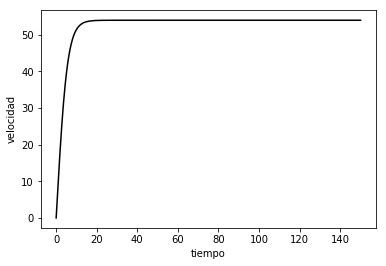

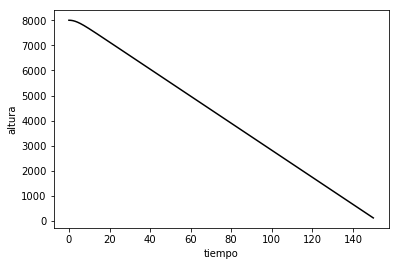

In [21]:
### ALUMNO
#def caida_libre(v0, h0, dt, tf, alpha, m):
# Hacer una función que integre la velocidad y altura con Euler explícito
#
def caida_libre(v0,h0,dt,tf,alpha,m):
    nt =int(tf/dt)
    v = numpy.zeros(nt+1)
    h = numpy.zeros(nt+1)
    time = numpy.zeros(nt+1)
    v[0] = v0
    h[0] = h0
    for t in range(nt):
        v[t+1] = v[t] + dt*(-alpha/m*v[t]**2 + 9.81)
        h[t+1] = h[t] - dt*v[t]
        time[t+1] = time[t]+dt
        
    return v, h, time
v0 = 0.
h0 = 8000.
tf = 150.
dt = 0.2
alpha = 0.27
m = 80
v,h,time = caida_libre(v0, h0, dt, tf, alpha, m)

plt.plot(time, v, c='k') 
plt.ylabel("velocidad")
plt.xlabel("tiempo")
plt.show()
plt.clf()
plt.plot(time, h, c='k') 
plt.ylabel("altura")
plt.xlabel("tiempo")
plt.show()

Ahora hagan los mismo gráficos con $\Delta t = 8$ ¿Pueden confiar en estos resultados? ¿Por qué se dan así?

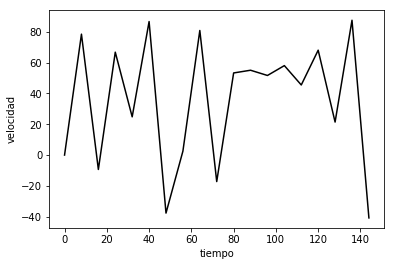

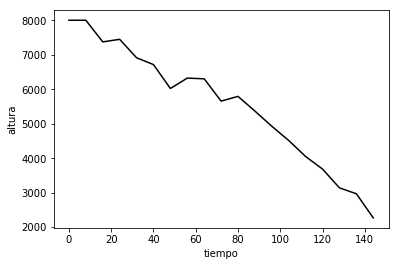

In [22]:
###ALUMNO
# Probar con otros valores de dt
###
v0 = 0.
h0 = 8000.
tf = 150.
dt = 8
alpha = 0.27
m = 80
v,h,time = caida_libre(v0, h0, dt, tf, alpha, m)

plt.plot(time, v, c='k') 
plt.ylabel("velocidad")
plt.xlabel("tiempo")
plt.show()
plt.clf()
plt.plot(time, h, c='k') 
plt.ylabel("altura")
plt.xlabel("tiempo")
plt.show()